In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [10]:
station = 'jci'

df = pd.read_csv(f'flagged_data/{station}_flagged.csv')
df.tail()

,date,temp,skt,dir,vel,hr,prec,pres,temp_jci,skt_jci,dir_jci,vel_jci,hr_jci,prec_jci,pres_jci
56171,2024-03-23 09:00:00+00:00,0.9,1.1,206.0,1.3,85.0,NaN,984.5,1,1,1,1,1,0,1
56172,2024-03-23 12:00:00+00:00,0.8,1.1,163.0,2.2,88.0,NaN,985.7,1,1,1,1,1,0,1
56173,2024-03-23 15:00:00+00:00,0.6,1.3,127.0,2.5,86.0,NaN,986.7,1,1,1,1,1,0,1
56174,2024-03-23 18:00:00+00:00,1.5,2.2,268.0,1.5,80.0,NaN,988.3,1,1,1,1,1,0,1
56175,2024-03-23 21:00:00+00:00,0.9,1.3,198.0,2.3,76.0,NaN,990.1,1,1,1,1,1,0,1


Obteniendo gráficas generales
Graficar temp en el primer eje Y (ax)
Graficar skt en el primer eje Y (ax)
Graficar dir en el primer eje Y (ax)
Graficar vel en el primer eje Y (ax)
Graficar hr en el primer eje Y (ax)
Graficar prec en el primer eje Y (ax)
Graficar pres en el primer eje Y (ax)


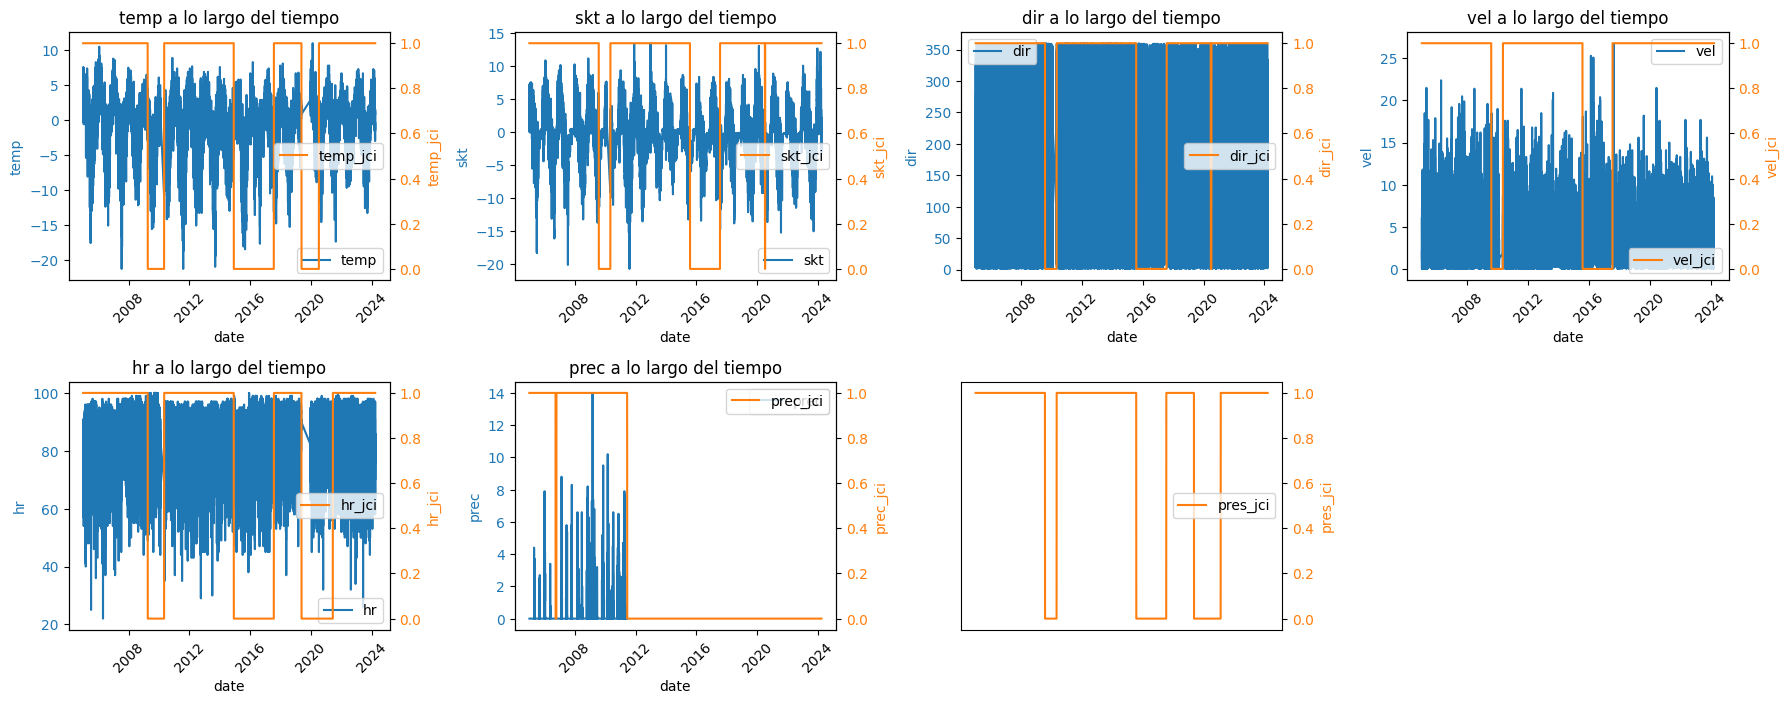

In [11]:
df['date'] = pd.to_datetime(df['date'])
print ('Obteniendo gráficas generales')
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(18, 10))  # Ajusta el tamaño de la figura según el número de filas


# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    station_col = f'{col}_{station}'  # Columna con el nombre de la estación

    if station_col in df.columns:  # Verificar si la columna _station existe
        print(f'Graficar {col} en el primer eje Y (ax)')
        
        # Primer eje Y para la columna principal
        color = 'tab:blue'
        ax.set_xlabel('date')
        ax.set_ylabel(col, color=color)
        sns.lineplot(x=df['date'], y=df[col], ax=ax, color=color, label=col)
        ax.tick_params(axis='y', labelcolor=color)
        ax.set_title(f'{col} a lo largo del tiempo')

        # Segundo eje Y para la columna _station
        ax2 = ax.twinx()  
        color = 'tab:orange'
        ax2.set_ylabel(station_col, color=color)
        sns.lineplot(x=df['date'], y=df[station_col], ax=ax2, color=color, label=station_col)
        ax2.tick_params(axis='y', labelcolor=color)

        # Rotar las etiquetas del eje X para mejor legibilidad
        ax.tick_params(axis='x', rotation=45)
        
# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 6
for i in range(num_cols * num_rows, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig(f'resource/new/flagged_{station}.png')
plt.show()